In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

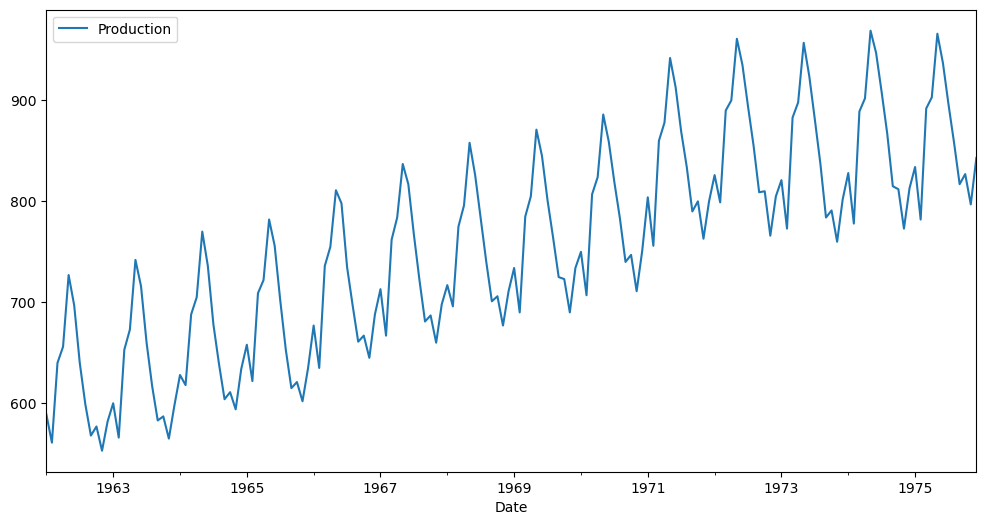

In [4]:
df.plot(figsize=(12,6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

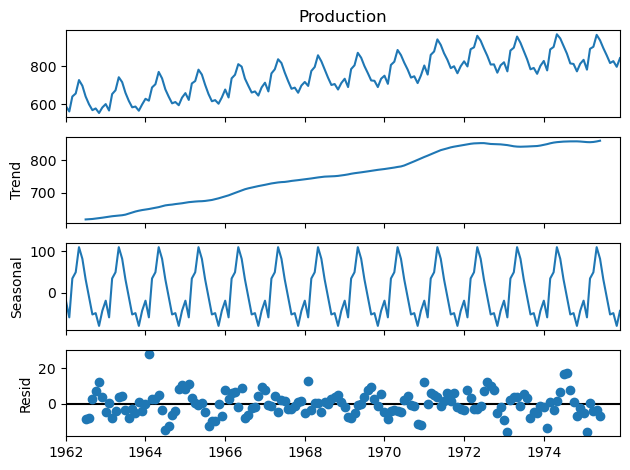

In [6]:
results = seasonal_decompose(df['Production'])
results.plot();

In [7]:
len(df)

168

In [8]:
train = df.iloc[:156]
test = df.iloc[156:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [11]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [19]:
scaled_train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [14]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.7 MB 1.7 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.7 MB 2.9 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.7 MB 5.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.7 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/fb/59/3eb58629e3749d9f4fc1e522487af369f9bd4c451f465d3054961fab6bf8/tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/8f/aa/ba0014cc4659328dc818a28827be78e6d97312ab0cb98105a770924dc11e/absl_py-2.3.1-py3-none-any.w

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
exceptiongroup 1.3.0 requires typing-extensions>=4.6.0; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
fastapi 0.110.0 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
polyfactory 2.21.0 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.20.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-settings 2.8.1 requires pydantic>=2.7.0, but you have pydantic 1.10.22 which is incompatible.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.
sqlalchemy 2.0.40 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
zenml 0.67.0 requires dock

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [21]:
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01923077 0.20913462 0.24759615]
Predict this y: 
 [[0.41826923]]


In [22]:
X.shape

(1, 3, 1)

In [23]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [25]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 4s 9ms/step - loss: 0.0481
Epoch 2/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0245
Epoch 3/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0229
Epoch 4/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0148
Epoch 5/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0096
Epoch 6/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0076
Epoch 7/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0042
Epoch 8/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0044
Epoch 9/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0042
Epoch 10/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0039
Epoch 11/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0035
Epoch 12/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0035
Epoch 13/50
144/144 [====

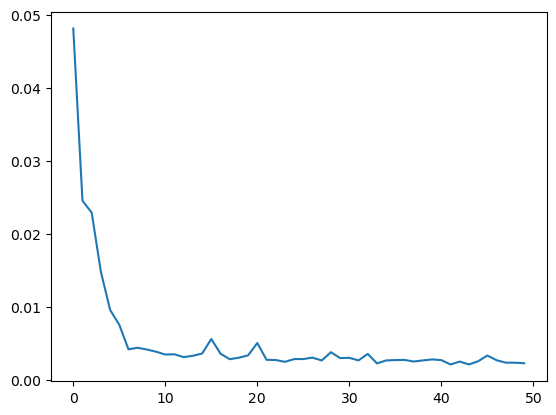

In [28]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [30]:
last_train_batch = scaled_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [31]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [32]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 380ms/step


array([[0.6453408]], dtype=float32)

In [34]:
scaled_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [33]:
scaled_test[0]

array([0.67548077])

In [35]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


After the first prediction, each new input sequence uses:

11 past values from previous input

1 new predicted value

The model never sees the actual test values during prediction.

It generates predictions step-by-step, feeding each predicted value back into the model to predict the next one.

In [36]:
test_predictions

[array([0.6453408], dtype=float32),
 array([0.6394151], dtype=float32),
 array([0.7955866], dtype=float32),
 array([0.864158], dtype=float32),
 array([0.92951], dtype=float32),
 array([0.93316054], dtype=float32),
 array([0.89191496], dtype=float32),
 array([0.81557935], dtype=float32),
 array([0.70317227], dtype=float32),
 array([0.6503054], dtype=float32),
 array([0.5947202], dtype=float32),
 array([0.6288891], dtype=float32)]

In [37]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [38]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[821.46177292],
       [818.99667549],
       [883.96401978],
       [912.48971748],
       [939.67615891],
       [941.19478607],
       [924.03662491],
       [892.28101158],
       [845.51966286],
       [823.52704239],
       [800.40359688],
       [814.61785889]])

In [39]:
test['Predictions'] = true_predictions

C:\Users\Rahul\AppData\Local\Temp\ipykernel_27192\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [40]:
test

,Production,Predictions
Date,,
1975-01-01,834,821.461773
1975-02-01,782,818.996675
1975-03-01,892,883.964020
1975-04-01,903,912.489717
1975-05-01,966,939.676159
1975-06-01,937,941.194786
1975-07-01,896,924.036625
1975-08-01,858,892.281012
1975-09-01,817,845.519663


<Axes: xlabel='Date'>

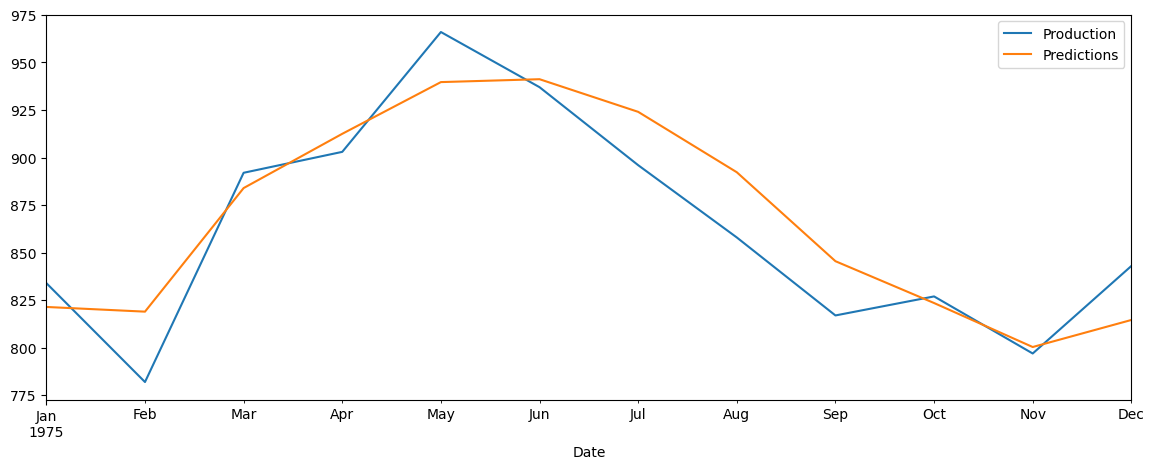

In [41]:
test.plot(figsize=(14,5))

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

22.351243055020646
